In [18]:
import os, sys
from scipy import stats
import numpy as np
import pandas as pd

from   scipy import stats
#-- for ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols

#-- for Tukey
from statsmodels.stats.multicomp import MultiComparison

sys.path.insert(1, '../src/')
from stat_lib import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Comparando-se o mesmo grupo muitas vezes

  - ANOVA
  - Tukey
  - Dunnett

## ANOVA - intuitivo

### ANOVA - Teste de Hipótese de Análise de Variâncias

H0 - hipótese nula:
  - todos grupos têm médias e desvios padrões amostrais próximos ou iguais
  - todas as variáveis randômicas são obtidas por sorteio de uma mesma distribuição
  
Ha - hipótese alternativa:
  - ao menos um grupo tem média e desvio padrão amostral diferentes dos outros
  - ao menos uma variável randômicas foi obtida por sorteio de uma outra distribuição

https://en.wikipedia.org/wiki/One-way_analysis_of_variance

### ANOVA H0 - hipótese nula:

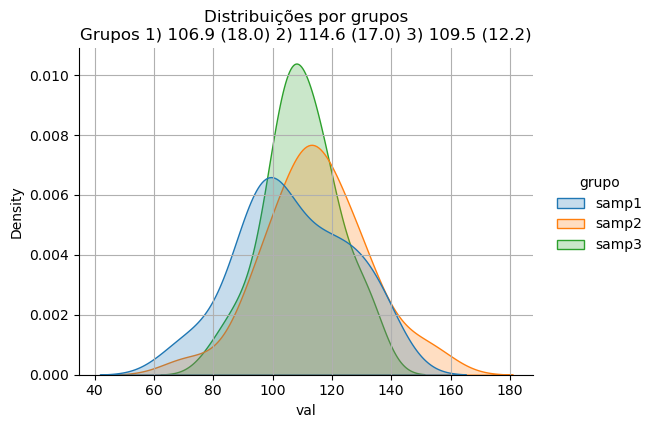

In [19]:
MU1 = 110; SSD1 = 15
MU2 = 115; SSD2 = 16
MU3 = 108; SSD3 = 13

N = 30

samp1 = np.random.normal(loc=MU1, scale=SSD1, size=N)
samp2 = np.random.normal(loc=MU2, scale=SSD2, size=N)
samp3 = np.random.normal(loc=MU3, scale=SSD3, size=N)

mu1 = np.mean(samp1); ssd1 = np.std(samp1)
mu2 = np.mean(samp2); ssd2 = np.std(samp2)
mu3 = np.mean(samp3); ssd3 = np.std(samp3)

df = join_3series(samp1, samp2, samp3)

sns.displot(df, x="val", hue="grupo", kind="kde", fill=True, height=4, aspect=1.4)

title = 'Distribuições por grupos'
title += f'\nGrupos 1) {mu1:.1f} ({ssd1:.1f}) 2) {mu2:.1f} ({ssd2:.1f}) 3) {mu3:.1f} ({ssd3:.1f})'
plt.grid()
plt.title(title);

### Mais que 2 grupos não use t-student

In [ ]:
df.head(3)

In [ ]:
model = ols('val ~ grupo', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

### Resultado da ANOVA

  - F = 2.084
  - p-valor = 0.131
  - Temos que aceitar a hipótese nula - todos grupos vẽm de uma mesma distribuição


### Grupo 3 divergindo

In [ ]:
MU1 = 110; SSD1 = 15
MU2 = 115; SSD2 = 16
MU3 = 148; SSD3 = 18

N = 30

samp1 = np.random.normal(loc=MU1, scale=SSD1, size=N)
samp2 = np.random.normal(loc=MU2, scale=SSD2, size=N)
samp3 = np.random.normal(loc=MU3, scale=SSD3, size=N)

mu1 = np.mean(samp1); ssd1 = np.std(samp1)
mu2 = np.mean(samp2); ssd2 = np.std(samp2)
mu3 = np.mean(samp3); ssd3 = np.std(samp3)

df = join_3series(samp1, samp2, samp3)

sns.displot(df, x="val", hue="grupo", kind="kde", fill=True, height=4, aspect=1.4)

title = 'Distribuições por grupos'
title += f'\nGrupos 1) {mu1:.1f} ({ssd1:.1f}) 2) {mu2:.1f} ({ssd2:.1f}) 3) {mu3:.1f} ({ssd3:.1f})'
plt.grid()
plt.title(title);

In [ ]:
model = ols('val ~ grupo', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

### Resultado da ANOVA

  - F = 48.38
  - p-valor = 7.5 e-15
  - Temos que rejeitar a hipótese nula - ao menos um grupo vem de outrra distribuição

### ANOVA - uses the F-statistics to calculate if the sum of errors between and withing groups are similar (H0)


<font size="5">$F_{stat} = \frac{MS_B}{MS_W}$</font>

<br>

where

<font size="5">$Mean\ Square = MS = \frac{SS}{dof}$</font>

<br>
therefore,


<font size="5">$MS_B = \frac{SSE_B}{dof_B}$</font>

<font size="5">$MS_W = \frac{SSE_W}{dof_W}$</font>

<br> 

#### F-distribution
<div style="background-color: white; padding: 10px;">
    
![f_distribuition wiki](../figure/f_distribuition_wiki.png)

</div>

### ANOVA - sum of erros within x between groups are the same?

  - What do you mean by error?
    - Error is the diference between a cell (single value) and each grupo mean
    - Another error is the difference between a grupo mean and the overall mean

### How to calculate it?

  - Calculate the means for each grupo (column) and overall mean
    
<br>  

![anova1](../figure/anova01.png)

<br>

### Lets calculate the means for each grupo (columns) (\<Yj>)
### and the overall mean - mean of all groups (\<Y>)

![anova1](../figure/anova02.png)

<br>

## Lets calculate the between groups sum of squared differences
  - is the sum, for each grupo, 
    - of the squared difference between the grupo mean less the overall mean
    - times the number of lines to achieve the grupo total difference
 
### Degree of freedom (dof or S)
  - number of groups - 1

<br>

![between groups](../figure/anova03.png)

## Lets calculate the within squared sum of errors
  - for each cell - its value - grupo mean
  - thereafter, you sum for each column, the squared values
  
### Degree of freedom (dof or f)
  - is the number of grous * (lines - 1)

<br>

![within sum of errors](../figure/anova04.png)

![within sum of errors](../figure/anova04b.png)

<br>

## Lets calculate the F-statistics for between over within groups

<br>

![anova1](../figure/anova05.png)

<br>

## Lets see the F-distribution 
  - dof = (2, 15)

<br>

![anova1](../figure/f-stat_result.png)

### Exercício:
  - Como você estimaria o p-value?
  - O que signfica este p-value?
  - Você consegue desenhar as 3 distribuições (3 grupos)?

### Novos exemplos
  - dadas 5 hipotéticas amostras
  - com media 140 e variando com delMU
  - com SSD 10, variando com delSSD

In [ ]:
samp_list=[]; mu_list = []; ssd_list = []
N   = 30
n_samp = 5

MU = 140; delMU = -2
SSD = 10; delSSD = -.1

for i in range(n_samp):
    samples = np.random.normal(loc=MU, scale=SSD, size=N)
    
    samp_list.append(samples)
    MU += delMU
    SSD += delSSD

    mu_list.append(np.mean(samp_list[i]))
    ssd_list.append(np.std(samp_list[i]))

In [ ]:
MU, delMU

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

seqx = np.linspace(70, 180, 100)
colors = ['red', 'blue', 'green', 'brown', 'black']

for i in range(n_samp):

    samples = samp_list[i]
    color = colors[i]

    label = f"{color} {mu_list[i]:.1f} ({ssd_list[i]:.1f})"
    ax = sns.histplot(samples, stat='density', color=color, alpha=.2, label=label, ax=ax)
    sns.rugplot(samples, color=color, alpha=0.4, ax=ax)

    plt.vlines(mu_list[i], 0, 0.042, color=color)

    normal_pdf = stats.norm.pdf(seqx, mu_list[i], ssd_list[i])
    sns.lineplot(x=seqx, y=normal_pdf, color=color)

title = 'Distribuições'
plt.legend()
plt.grid()
plt.title(title);


### As distribuições são nomais? teste de Shaprio-Wilkis

In [ ]:
for i in range(n_samp):
    ret, text, text_stat, stat, pvalue = calc_normalidade_SWT(samp_list[i])
    print(text, '\n', text_stat, '\n')

### Alguma distribuição tem média diferente? one-way ANOVA

In [ ]:
def test_one_way_ANOVA5 (samp1, samp2, samp3, samp4, samp5, alpha = 0.05):
    # teste de variancias de Fisher - one way ANOVA (analysis of variance)
    stat, pvalue = stats.f_oneway(samp1, samp2, samp3, samp4, samp5)

    if pvalue > alpha:
        text = 'As distribuições têm médias similares (não se rejeita a H0)'
        ret = True
    else:
        text = 'As distribuições não têm médias similares (rejeita-se a H0)'
        ret = False

    text_stat = 'p-value %.2e (%s)'%(pvalue, stat_asteristics(pvalue))

    return ret, text, text_stat, stat, pvalue

In [ ]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samp_list[0],samp_list[1],samp_list[2],samp_list[3],samp_list[4])
text, text_stat, stat

### Uma outra forma de calcular ANOVA - tabela summary

In [ ]:
#-- tabela stack
df_list=[]

for i in range(0,5):
    dfa = pd.DataFrame({'val': samp_list[i], 'grupo':[i]*N})
    df_list.append(dfa)

df = pd.concat(df_list)
df.reset_index(inplace=True, drop=True)
df.tail(3)

In [ ]:
model = ols('val ~ grupo', data=df).fit()
aov_table = sm.stats.anova_lm(model, type=2)
aov_table

In [ ]:
type(aov_table)

In [ ]:
SMb = aov_table.loc['grupo'].sum_sq
SMw = aov_table.loc['Residual'].sum_sq
dof = aov_table.loc['Residual'].df


### grupo - SM (entre groups - between)
### residual - SM (dentros dos grupos - within)

F = SM_b / SM_w

In [ ]:
_SMb = SMb /1
_SMw = SMw / dof

SMb, SMw, dof, _SMb/_SMw